In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import hvplot.pandas
import plotly.figure_factory as ff

In [16]:
file_path = "Resources/new_iris_data.csv"
df_iris = pd.read_csv(file_path)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
iris_scaled = StandardScaler().fit_transform(df_iris)
print(iris_scaled[0:5])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [18]:
# Initialize PCA model
pca = PCA(n_components=2)

In [19]:
# Get two principal components for the iris data.
iris_pca = pca.fit_transform(iris_scaled)

In [20]:
# Transform PCA data to a DataFrame
df_iris_pca = pd.DataFrame(
    data=iris_pca, columns=["principal component 1", "principal component 2"]
)
df_iris_pca.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [21]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [22]:
# Find the best value for K
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_iris_pca)
    inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

C:\Users\yvari\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



:Curve   [k]   (inertia)

In [23]:
# Initialize the K-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_iris_pca)

# Predict clusters
predictions = model.predict(df_iris_pca)

# Add the predicted class columns
df_iris_pca["class"] = model.labels_
df_iris_pca.head()

,principal component 1,principal component 2,class
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0


In [24]:
df_iris_pca.hvplot.scatter(
    x="principal component 1",
    y="principal component 2",
    hover_cols=["class"],
    by="class",
)

:NdOverlay   [class]
   :Scatter   [principal component 1]   (principal component 2,class)

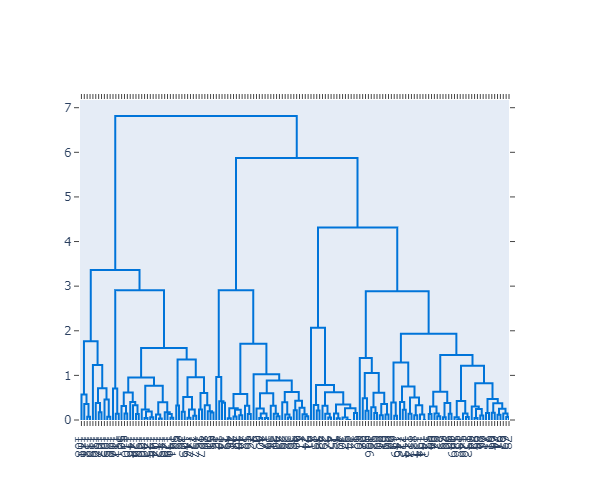

In [25]:
# Create the dendrogram
fig = ff.create_dendrogram(df_iris_pca, color_threshold=0)
fig.update_layout(width=800, height=500)
fig.show()

In [26]:
agg = AgglomerativeClustering(n_clusters=3)
model = agg.fit(df_iris_pca)

In [27]:
df_iris_pca["class"] = model.labels_
df_iris_pca.head()

,principal component 1,principal component 2,class
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0


In [28]:
df_iris_pca.hvplot.scatter(
    x="principal component 1",
    y="principal component 2",
    hover_cols=["class"],
    by="class",
)

:NdOverlay   [class]
   :Scatter   [principal component 1]   (principal component 2,class)